In [2]:
import tensorflow as tf
import numpy as np
import os
import time
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import datetime
import random
import pandas as pd

from IPython import display
from gan.gan_dataset import get_gan_dataset
from gan.gan_models import make_discriminator_model
from src.generators import *
from src.models import *
from src.losses import *

batch_size = 12

gan_size = 64
gan_depth = 1
gan_train_frac = 0.8
gan_val_frac = 0.1

src_window_size = 2
src_sample_size = 12
src_tile_size = 64
src_seed_size = 100

epochs = 50


src_data_dir = "data_size64_duration6_window2_4hourly"


src_train_ids = np.load(src_data_dir + '/train_ids.npy')
src_val_ids = np.load(src_data_dir + '/val_ids.npy')
mean, std, src_train_dataset = get_src_dataset(src_data_dir, src_train_ids, src_window_size, batch_size = batch_size)
mean, std, src_val_dataset = get_src_dataset(src_data_dir, src_val_ids, src_window_size, batch_size = batch_size)


2023-07-26 21:26:44.141396: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-26 21:26:44.299193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-26 21:26:44.299919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-26 21:26:44.300839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFl

In [1]:
print("hi")

hi


In [2]:
print(sample_batch)

NameError: name 'sample_batch' is not defined

In [ ]:
for batch in src_train_dataset:
    print(batch)
    break

In [11]:
for batch in src_train_dataset:
    sample_batch = batch
    break

In [4]:
print(sample_batch[0].shape)

(12, 12, 64, 64)


In [3]:
import pyinterp

ModuleNotFoundError: No module named 'pyinterp'

In [7]:
import numpy as np
import pyinterp

ModuleNotFoundError: No module named 'pyinterp'

In [6]:
x_axis = pyinterp.Axis(numpy.arange(-180.0, 180.0, 1.0), is_circle=True)

NameError: name 'pyinterp' is not defined

In [5]:
!pip install pykrige

  Using cached PyKrige-1.7.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (860 kB)


In [12]:
sample = sample_batch[0][0, :, :, :]

In [13]:
sample_y = sample_batch[1][0, :, :, :]

In [14]:
print(sample.shape)

(12, 64, 64)


In [15]:
print(sample_y.shape)

(12, 64, 64)


In [34]:
sample_t_y = sample_batch[1][0, :, :, :]

In [17]:
sample = sample.numpy()

In [19]:
print((sample == 0).sum())

37151


In [21]:
print(sample.size)

49152


In [22]:
sample_y = sample_y.numpy()

In [25]:
print((np.isnan(sample_y)).sum())

37151


In [36]:
ind = 11


41291
41291


In [3]:
def np_mse_loss(y_true, y_pred):
    mask = ~np.isnan(y_true)
    return np.mean(np.square(y_true[mask] - y_pred[mask]))

In [ ]:
for sample_batch in src_train_dataset:
    print(sample_

In [4]:
for sample_batch in src_train_dataset:
    for ind in range(12):
        sample = sample_batch[0][ind, :, :, :].numpy()
        sample_y = sample_batch[1][ind, :, :, :].numpy()
        loss = np_mse_loss(sample_y, sample)
        print(loss)
        if loss > 1:
            break
    if loss > 1:
        break
            

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.00038390353
0.0012074142
0.0011506485
0.0011355755
0.0011298398
0.0011221112
0.0014748177
0.0018686926
0.0019140439
0.0020599575
0.0022301439
0.0023176915
0.0018923624
0.00091178465
0.00092692097
0.00094261183
0.00096401357
0.0009889946
0.0005072607
0.0
0.0
0.0
0.0
0.0
0.00014809787
0.00026027052
0.00025582782
0.00024801373
0.00023874598
0.0002329542
0

In [15]:
print(np_mse_loss(sample_y, sample))

1.0429579


In [18]:
import matplotlib.pyplot as plt

In [28]:
import tensorflow as tf

In [29]:
ten = tf.convert_to_tensor(np.array([[1, np.nan], [2, 3]]))

In [30]:
print(ten)

tf.Tensor(
[[ 1. nan]
 [ 2.  3.]], shape=(2, 2), dtype=float64)


In [33]:
def fn():
    return np.array([1, np.nan])

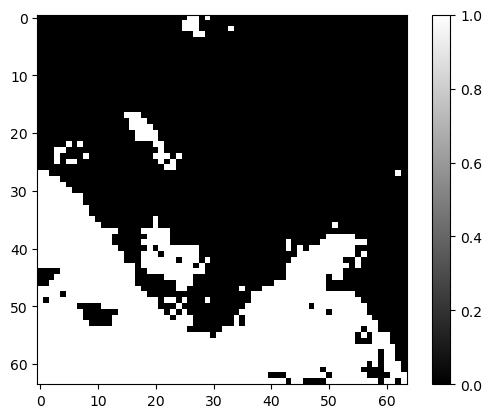

In [14]:
plt.imshow(sample[0, :, :] == 0, cmap='gray')
plt.colorbar()

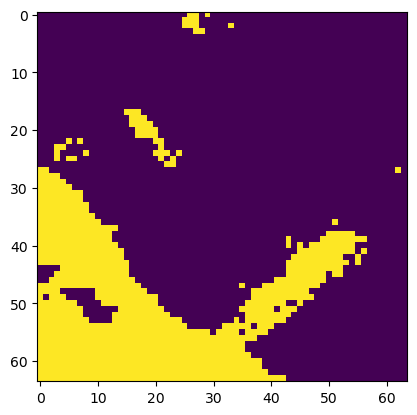

In [12]:
plt.imshow(np.isnan(sample_y[0, :, :]))

In [7]:
sample[sample == 0] = np.nan

In [54]:
!pip install pykrige

  Using cached PyKrige-1.7.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (860 kB)


In [16]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)


In [5]:

from pykrige.ok3d import OrdinaryKriging3D
from pykrige.uk3d import UniversalKriging3D

In [8]:
locs = np.where(~np.isnan(sample))

In [9]:
print(locs[2].shape)

(11544,)


In [20]:
print(locs)

(array([ 0,  0,  0, ..., 11, 11, 11]), array([ 0,  0,  0, ..., 63, 63, 63]), array([ 0,  1,  2, ..., 61, 62, 63]))


In [23]:
data_arr = sample[locs[0], locs[1], locs[2]]

In [24]:
print(data_arr)

[-3.3268228 -3.312258  -3.2794707 ... -0.8567458 -0.827594  -0.827594 ]


In [25]:
print(data_arr.shape)

(11544,)


In [32]:
gridx = np.arange(0.0, sample.shape[1])
gridy = np.arange(0.0, sample.shape[2])
gridz = np.arange(0.0, sample.shape[0])

In [27]:
ok3d = OrdinaryKriging3D(
    locs[1], locs[2], locs[0], data_arr, variogram_model="linear", verbose=True
)
print("Done")
k3d1, ss3d = ok3d.execute("grid", gridx, gridy, gridz)


Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 0.03179996710245831
Nugget: 1.1024766601683322e-23 

Calculating statistics on variogram model fit...


KeyboardInterrupt: 

In [33]:
uk3d = UniversalKriging3D(
    locs[1][:5], locs[2][:5], locs[0][:5], data_arr[:5], variogram_model="linear", verbose=True
)
print("Done")
k3d1, ss3d = uk3d.execute("grid", gridx, gridy, gridz)


Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 7.971728529467342e-08
Nugget: 0.000286702300005397 

Calculating statistics on variogram model fit...
Q1 = 0.35039755959967583
Q2 = 1.8013876189207998
cR = 0.0007727201446623131 

Initializing drift terms...
Done
Executing Ordinary Kriging...



In [36]:
print(len(locs[1]))

11544


In [52]:
arr = np.zeros((len(locs[0]), 4))
arr[:, 0] = locs[2]
arr[:, 1] = locs[1]
arr[:, 2] = locs[0]
arr[:, 3] = data_arr

In [38]:
print(arr)

[[ 0.          0.          0.         -3.32682276]
 [ 0.          1.          0.         -3.31225801]
 [ 0.          2.          0.         -3.27947068]
 ...
 [63.         61.         11.         -0.85674578]
 [63.         62.         11.         -0.82759398]
 [63.         63.         11.         -0.82759398]]


In [53]:
np.random.shuffle(arr)

In [40]:
print(arr)

[[23.         46.          4.         -1.99339974]
 [34.         57.          4.         -0.66729236]
 [ 9.         12.          3.         -3.34868121]
 ...
 [ 1.          5.          1.         -3.5478518 ]
 [ 0.         24.         11.         -2.88236332]
 [ 6.          4.          0.         -3.03294754]]


In [54]:
uk3d = UniversalKriging3D(
    arr[:1000, 0], arr[:1000, 1], arr[:1000, 2], arr[:1000, 3], variogram_model="linear", verbose=True
)
print("Done")
vals, ss3d = uk3d.execute("grid", gridx, gridy, gridz)


Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 0.030635563779679912
Nugget: 5.662414934757643e-13 

Calculating statistics on variogram model fit...
Q1 = 0.01154367925643355
Q2 = 0.2781768446439894
cR = 0.021267075153006087 

Initializing drift terms...
Done
Executing Ordinary Kriging...



In [58]:
uk3d = UniversalKriging3D(
    arr[:100, 0], arr[:100, 1], arr[:100, 2], arr[:100, 3], variogram_model="linear", verbose=True
)
print("Done")
vals_worse, ss3d = uk3d.execute("grid", gridx, gridy, gridz)


Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 0.024421017447178745
Nugget: 0.06452598678067974 

Calculating statistics on variogram model fit...
Q1 = 0.06310833369025527
Q2 = 0.347611011966507
cR = 0.09412352334896608 

Initializing drift terms...
Done
Executing Ordinary Kriging...



In [68]:
ok3d = OrdinaryKriging3D(
    arr[:100, 0], arr[:100, 1], arr[:100, 2], arr[:100, 3], variogram_model="linear", verbose=True
)
print("Done")
vals_worse_o, ss3d = uk3d.execute("grid", gridx, gridy, gridz)


Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 0.024421017447178745
Nugget: 0.06452598678067974 

Calculating statistics on variogram model fit...
Q1 = 0.06310833369025527
Q2 = 0.347611011966507
cR = 0.09412352334896608 

Done
Executing Ordinary Kriging...



In [63]:
sample[np.isnan(sample)] = 0

In [64]:
print(np_mse_loss(sample_y, sample))

1.0429579


In [66]:
print(np_mse_loss(sample_y, vals_worse))

0.05103166380921519


In [67]:
print(np_mse_loss(sample_y, vals))

0.01747680606426463


In [70]:
print(np_mse_loss(sample_y, vals_worse_o))

0.05103166380921519


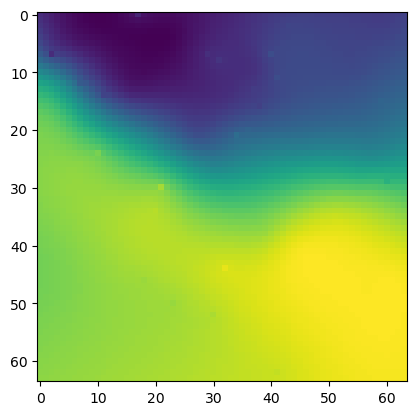

In [69]:
plt.imshow(vals_worse_o[0, :, :])

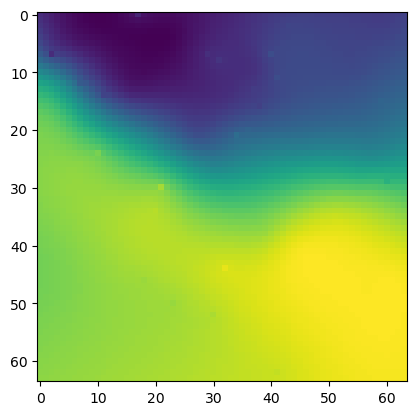

In [59]:
plt.imshow(vals_worse[0, :, :])

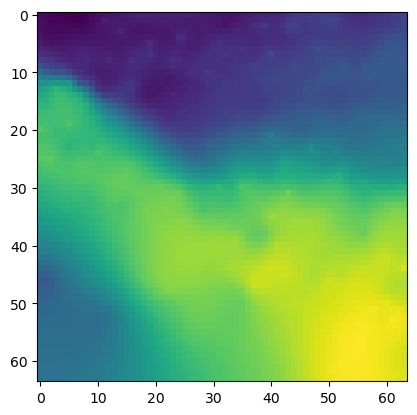

In [55]:
plt.imshow(vals[0, :, :])

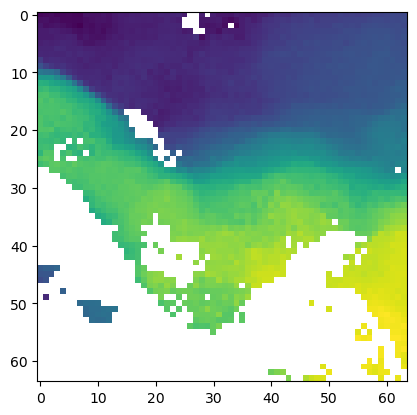

In [56]:
plt.imshow(sample[0, :, :])

In [2]:
plt.imshow(sample_y[0, :, :])

NameError: name 'plt' is not defined

In [45]:
print(k3d1.shape)

(12, 64, 64)


In [35]:
print(k3d1.shape)

(12, 64, 64)


In [31]:
print(len(data_arr))

11544


In [71]:
from src.models import *

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from src.models import *
from src.losses import *
from src.generators import *

2023-07-26 21:26:36.037354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 21:26:36.476823: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [93]:
def get_trained_ConvLSTM_Seeded(experiment_dir):
    #params = pd.read_csv(experiment_dir + '/model_params.csv')
    
    n_t = 12
    tile_size = 64
    seed_size = 100
    filter_size = 64
    filter_depth = 1
    model = create_ConvLSTM_Seeded(n_t = n_t, tile_size = tile_size, seed_size = seed_size, filter_size = filter_size, filter_depth = filter_depth)
    p = Path(experiment_dir)
    pg = list(p.glob("*interpolator_weights*.h5"))
    pg.sort()
    
    model.load_weights(pg[-1])
    return model

In [94]:
model_seeded = get_trained_ConvLSTM_Seeded("experiments/experiment_2023-07-26_14:19:25.398247")

In [98]:
def evaluate_ConvLSTM_Seeded(model, dataset):
    src_seed_size = 100
    
    counter = 0
    tot = 0
    for batch in dataset:
        batch_x, batch_y = batch
        print(batch_x.shape)
        for ind in range(batch_x.shape[0]):
            x = tf.reshape(batch_x[ind, :, :, :], (1, 12, 64, 64, 1))
            y = batch_y[ind, :, :, :]
            
            noise = tf.random.normal([x.shape[0], src_seed_size])
            pred_outputs = tf.reshape(model([x, noise], training=False), y.shape)
            
            #plt.imshow(pred_outputs.numpy()[10])
            plt.imshow(pred_outputs.numpy()[10])
            interp_loss = np_mse_loss(y.numpy(), pred_outputs.numpy())
            print(interp_loss)

            tot += interp_loss
            counter += 1
        if counter > 100:
            break
    return tot/counter

(12, 12, 64, 64)
y 0.3830973307291667
[-0.9296142  -0.9053173  -0.88103527 ...  2.305548    2.0724
  1.6060822 ]
[-0.7603641  -0.5941298  -0.6297045  ...  0.65722847  0.40474418
  0.6662056 ]
0.39127114
y 0.3474324544270833
[-0.98788446 -0.97330856 -0.9660373  ...  2.305548    2.0724
  1.6060822 ]
[-0.65968305 -0.5945701  -0.62962335 ...  0.5238589   0.268379
  0.4669906 ]
0.3691724
y 0.3049519856770833
[-0.7292316 -0.7255737 -0.6162822 ...  2.305548   2.0724     1.6060822]
[-0.54671943 -0.3992979  -0.43604153 ...  0.70168865  0.40157914
  0.68958884]
0.51614636
y 0.2519124348958333
[-0.22283281 -0.21552818 -0.20459902 ...  1.6060822  -0.01881458
  0.3163757 ]
[ 0.8174268   0.8399872   0.80105805 ...  0.43165517 -0.24715897
 -0.29062533]
0.4152161
y 0.19637044270833334
[0.13786252 0.12328661 0.12328661 ... 0.3163757  0.5276652  0.30908218]
[ 1.0258018  1.1033534  1.0663751 ... -0.3326313 -0.277143  -0.3201332]
0.22491184
y 0.15614827473958334
[0.01277582 0.01762333 0.07106462 ... 0.527

1.5031968864301841

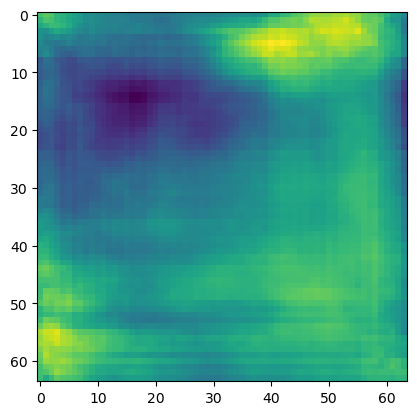

In [79]:
evaluate_ConvLSTM_Seeded(model, [sample_batch])

In [88]:
def np_mse_loss(y_true, y_pred):
    mask = ~np.isnan(y_true)
    # print("y", mask.sum()/y_true.size)
    # print(y_true[mask])
    # print(y_pred[mask])
    return np.mean(np.square(y_true[mask] - y_pred[mask]))

def evaluate_baseline(dataset):
    counter = 0
    tot = 0
    for batch in dataset:
        batch_x, batch_y = batch
        batch_x = batch_x.numpy()
        batch_y = batch_y.numpy()
        for ind in range(batch_x.shape[0]):
            x = batch_x[ind, :, :, :]
            y = batch_y[ind, :, :, :]
            
            locs = np.where(x != 0)
            #print("x", len(locs[0])/x.size)

            gridx = np.arange(0.0, x.shape[1])
            gridy = np.arange(0.0, x.shape[2])
            gridz = np.arange(0.0, x.shape[0])
            arr = np.zeros((len(locs[0]), 4))

            data_arr = x[locs[0], locs[1], locs[2]]

            arr[:, 0] = locs[2]
            arr[:, 1] = locs[1]
            arr[:, 2] = locs[0]
            arr[:, 3] = data_arr
            np.random.shuffle(arr)
            uk3d = UniversalKriging3D(
                arr[:100, 0], arr[:100, 1], arr[:100, 2], arr[:100, 3], variogram_model="linear", verbose=False
            )
            vals, ss3d = uk3d.execute("grid", gridx, gridy, gridz)
            interp_loss = np_mse_loss(y, vals)
            plt.imshow(vals[10])
            print("Loss", interp_loss)
            tot += interp_loss
            counter += 1
        if counter > 100:
            break
    return tot/counter
        

        

x 0.3830973307291667
y 0.3830973307291667
[-0.9296142  -0.9053173  -0.88103527 ...  2.305548    2.0724
  1.6060822 ]
[0.05094457439046018 0.05094457476276487 0.050944575193689993 ...
 0.05094459779780166 0.05094460734287866 0.05094459966722077]
Loss 0.47689233560998157
x 0.3474324544270833
y 0.3474324544270833
[-0.98788446 -0.97330856 -0.9660373  ...  2.305548    2.0724
  1.6060822 ]
[0.13189418097621738 0.13189418098914202 0.13189418100331546 ...
 0.13189418066971131 0.13189418076416948 0.131894180677795]
Loss 0.4513277946996863
x 0.3049519856770833
y 0.3049519856770833
[-0.7292316 -0.7255737 -0.6162822 ...  2.305548   2.0724     1.6060822]
[-0.09526054679219068 -0.09614943706850416 -0.09635628965146657 ...
 0.25360564353146875 0.2957180142393936 0.2719226141453273]
Loss 0.3030371552632537
x 0.2519124348958333
y 0.2519124348958333
[-0.22283281 -0.21552818 -0.20459902 ...  1.6060822  -0.01881458
  0.3163757 ]
[-0.11216234958164058 -0.10894765811532901 -0.10404161908424038 ...
 0.395428

0.18251823191473915

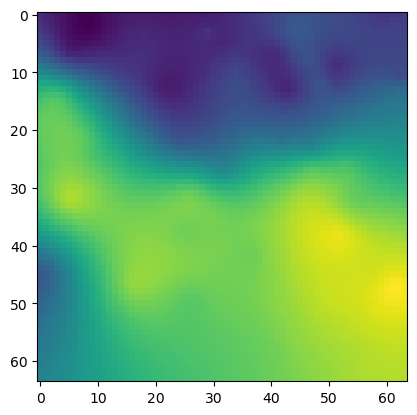

In [58]:
evaluate_baseline([sample_batch])

In [68]:
def get_trained_ConvLSTM(experiment_dir):
    # params = pd.read_csv(experiment_dir + '/model_params.csv')
    # sample_size = params['src_sample_size'].iloc[0]
    # tile_size = params['src_tile_size'].iloc[0]
    sample_size = 12
    tile_size = 64
    model = create_ConvLSTM(n_t = sample_size, tile_size = tile_size)

    model.load_weights("weights/convlstm_sst_attempt_2023-07-17 14:59:27.218455.h5")
    return model

In [70]:
model2 = get_trained_ConvLSTM("hi")

In [71]:
model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 12, 64, 64,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv3d_38 (Conv3D)             (None, 12, 32, 32,   272         ['input_5[0][0]']                
                                16)                                                               
                                                                                                  
 batch_normalization_22 (BatchN  (None, 12, 32, 32,   64         ['conv3d_38[0][0]']              
 ormalization)                  16)                                                         

In [90]:
def evaluate_ConvLSTM(model, dataset):
    counter = 0
    tot = 0
    for batch in dataset:
        batch_x, batch_y = batch
        for ind in range(batch_x.shape[0]):
            x = tf.reshape(batch_x[ind, :, :, :], (1, 12, 64, 64, 1))
           
            y = batch_y[ind, :, :, :]
            
            pred_outputs = tf.reshape(model(x, training=False), y.shape)

            interp_loss = np_mse_loss(y.numpy(), pred_outputs.numpy())
            print("Loss", interp_loss)
            tot += interp_loss
            counter += 1
        if counter > 100:
            break
    return tot/counter

In [ ]:
evaluate_ConvLSTM_Seeded(

In [91]:
evaluate_ConvLSTM(model2, src_val_dataset)

Loss 0.39458534
Loss 0.3639173
Loss 0.36307994
Loss 0.36500835
Loss 0.4276721
Loss 0.48772782
Loss 0.38150916
Loss 0.36578456
Loss 0.36315855
Loss 0.2866515
Loss 0.27846277
Loss 0.33492902
Loss 0.2821052
Loss 0.2502105
Loss 0.2749192
Loss 0.24818084
Loss 0.23590901
Loss 0.19301634
Loss 0.19097237
Loss 0.19963661
Loss 0.2045563
Loss 0.1972149
Loss 0.18737482
Loss 0.15055604
Loss 0.08305678
Loss 0.08227667
Loss 0.08326775
Loss 0.083188154
Loss 0.08522043
Loss 0.0758415
Loss 0.07667402
Loss 0.0737051
Loss 0.07552195
Loss 0.07727142
Loss 0.07645661
Loss 0.070135646
Loss 0.0785809
Loss 0.07296173
Loss 0.06591712
Loss 0.067903675
Loss 0.0706656
Loss 0.078214854
Loss 0.07431292
Loss 0.06716744
Loss 0.069950655
Loss 0.06289443
Loss 0.06762916
Loss 0.09049685
Loss 0.09166465
Loss 0.085498184
Loss 0.079879895
Loss 0.07887814
Loss 0.10761888
Loss 0.1596722
Loss 0.15910605
Loss 0.15412022
Loss 0.14959659
Loss 0.14890881
Loss 0.17186274
Loss 0.1948008
Loss 0.25904915
Loss 0.25909334
Loss 0.2718279


0.1802459655812493

Loss 0.31589626448684893
Loss 0.3365901711173015
Loss 0.32773096958710046
Loss 0.32038178136717615
Loss 0.43532963025933286
Loss 0.42998717234716755
Loss 0.9415686388708916
Loss 1.164789303835826
Loss 0.8336192871336332
Loss 1.196671961256961
Loss 1.8093872544135443
Loss 0.6655703385464901
Loss 0.8977586078658866
Loss 1.7835534578369971
Loss 0.6221179175340864
Loss 0.7428758269700423
Loss 0.4714200147994933
Loss 0.5167890694612864
Loss 0.4414785928755656
Loss 0.420174657935569
Loss 0.4403888851765387
Loss 0.5581358563161358
Loss 0.39348819398716073
Loss 0.30218629543376274
Loss 0.1847096048667827
Loss 0.17804946790166787
Loss 0.3171017276944922
Loss 0.2083285922617482
Loss 0.21312837276340907
Loss 0.26611942794165844
Loss 0.22066207647644262
Loss 0.2659753239724219
Loss 0.26297092324132554
Loss 0.15488832791704407
Loss 0.28370460533466496
Loss 0.13376012817778607
Loss 0.15117471606645527
Loss 0.10058002902381674
Loss 0.18326632395782375
Loss 0.1452879477824586
Loss 0.18928329399978494


0.49305762187624186

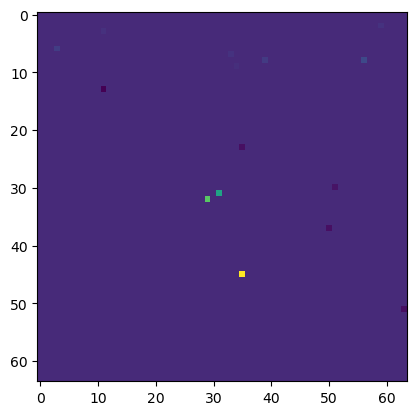

In [92]:
evaluate_baseline(src_val_dataset)

(12, 12, 64, 64)
1.7797319
1.852486
2.1502743
1.9237766
1.8289028
2.190841
3.4169164
3.5446253
3.3920078
3.242636
3.0386612
3.035598
(12, 12, 64, 64)
3.1757061
3.2400045
3.227189
3.1110125
3.0108588
2.9024727
2.6191397
2.280751
2.3736537
2.655221
2.2377183
1.9765962
(12, 12, 64, 64)
1.2611593
1.2283845
1.2054981
1.1479883
1.2045993
1.1436902
1.0909383
1.2661078
1.3933637
1.4184055
1.3750725
1.0739517
(12, 12, 64, 64)
0.97569776
1.0272652
1.3480997
1.7213662
1.5293995
1.4016714
1.3915209
1.4278051
1.4255291
1.6610271
1.843739
1.7404753
(12, 12, 64, 64)
1.6570767
1.6850555
1.7100247
1.7170511
1.5880183
2.0156484
1.842882
1.9033511
1.8260567
1.8770771
1.4839121
1.6034869
(12, 12, 64, 64)
2.68787
3.0265183
3.2990673
3.3353288
2.6960545
2.4863663
2.1648717
1.9539708
1.9506266
2.0866582
1.6221976
1.400407
(12, 12, 64, 64)
1.2413101
1.439586
1.4455234
1.5251203
1.5934694
0.982499
0.76801556
0.7533512
0.7658515
0.8846951
0.9336387
1.0088892
(12, 12, 64, 64)
1.1431258
1.0725461
1.3294662
2.2411

1.872729918471089

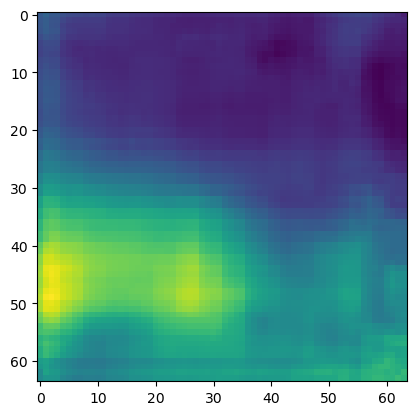

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/backend.py", line 5130, in <genexpr>
    ta.write(ta_index_to_write, out)  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/backend.py", line 5130, in <genexpr>
    ta.write(ta_index_to_write, out)  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


In [99]:
evaluate_ConvLSTM_Seeded(model_seeded, src_val_dataset)